In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
# Definisikan model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv_1'),
    MaxPooling2D((2, 2), name='maxpool_1'),
    Conv2D(64, (3, 3), activation='relu', name='conv_2'),
    MaxPooling2D((2, 2), name='maxpool_2'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='dense_1'),
    Dense(10, activation='softmax', name='output')
])

In [13]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Ringkasan model untuk melihat arsitektur
model.summary()

# Label untuk dataset CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4268 - accuracy: 0.4880 - val_loss: 1.1830 - val_accuracy: 0.5887
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0601 - accuracy: 0.6293 - val_loss: 0.9971 - val_accuracy: 0.6574
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9225 - accuracy: 0.6791 - val_loss: 0.9747 - val_accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8292 - accuracy: 0.7110 - val_loss: 0.9812 - val_accuracy: 0.6610
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7463 - accuracy: 0.7413 - val_loss: 0.8907 - val_accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6758 - accuracy: 0.7645 - val_loss: 0.9151 - val_accuracy: 0.6944
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6116 - accuracy: 0.7836 - val_loss: 0.8661 -

In [14]:
 #Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi pixel ke rentang [0, 1]
    return img_array

In [15]:
# Fungsi untuk prediksi gambar dan menampilkan hasil
def predict_and_display(img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    predicted_label = class_names[predicted_class]

    plt.imshow(image.load_img(img_path, target_size=(32, 32)))
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
    return predicted_label

1/1 [==============================] - 0s 86ms/step


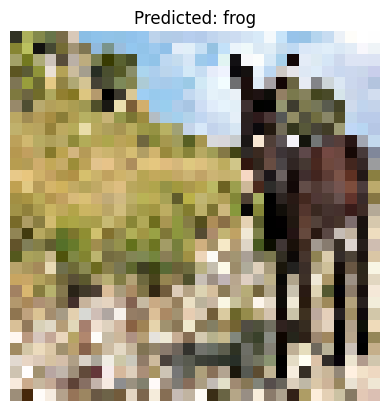

1/1 [==============================] - 0s 21ms/step


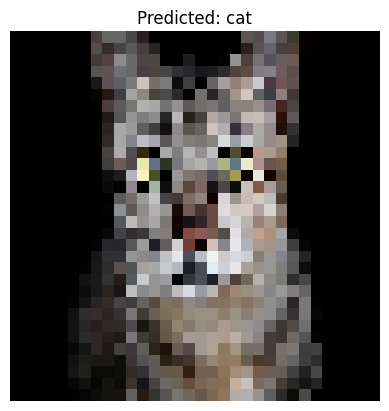

In [16]:
# Input gambar pengguna
img_path1 = 'keledai.jpg'  # Ganti dengan path gambar pertama Anda
img_path2 = 'cat2.jpeg'  # Ganti dengan path gambar kedua Anda

# Prediksi dan tampilkan hasil
label1 = predict_and_display(img_path1)
label2 = predict_and_display(img_path2)

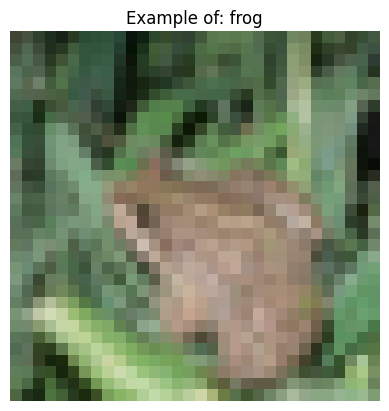

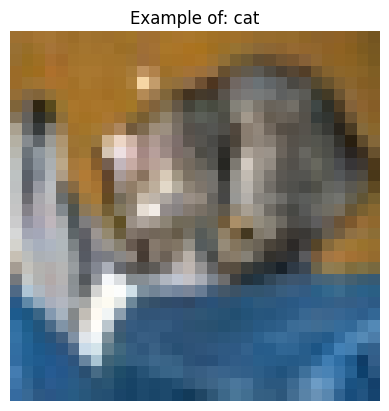

In [17]:
# Tampilkan contoh gambar dari dataset yang sesuai dengan prediksi
def display_example_image(label):
    class_idx = class_names.index(label)
    example_idx = np.where(y_test == class_idx)[0][0]
    example_image = x_test[example_idx]

    plt.imshow(example_image)
    plt.title(f'Example of: {label}')
    plt.axis('off')
    plt.show()

display_example_image(label1)
display_example_image(label2)

In [18]:
# Visualisasi perhitungan layer convolution, max pooling, dan flatten
def visualize_layer(layer_name, img_array):
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(img_array)

    print(f"Layer: {layer_name}")
    print(f"Output shape: {intermediate_output.shape}")
    print("Output values:")
    print(intermediate_output)

    num_filters = intermediate_output.shape[-1]
    fig, axes = plt.subplots(1, min(num_filters, 5), figsize=(20, 20))

    for i in range(min(num_filters, 5)):
        ax = axes[i]
        ax.imshow(intermediate_output[0, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.show()

1/1 [==============================] - 0s 65ms/step
Layer: conv_1
Output shape: (1, 30, 30, 32)
Output values:
[[[[0.         0.         0.         ... 0.         0.22535992
    0.16841117]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.12209329 0.         0.         ... 0.         0.27205554
    0.        ]
   ...
   [0.         0.38920024 0.442212   ... 0.         0.
    0.17945442]
   [0.         0.40553376 0.4175495  ... 0.         0.
    0.11926176]
   [0.         0.42689708 0.400498   ... 0.         0.
    0.12551597]]

  [[0.         0.         0.         ... 0.         0.
    0.0339617 ]
   [0.19118959 0.         0.         ... 0.         0.
    0.        ]
   [0.2861246  0.12334907 0.         ... 0.         0.27833045
    0.        ]
   ...
   [0.         0.3832784  0.47348213 ... 0.         0.
    0.1119853 ]
   [0.         0.38521585 0.46131563 ... 0.         0.
    0.12505531]
   [0.         0.39925912 0.44208568 ... 0.         0.
    0.1593150

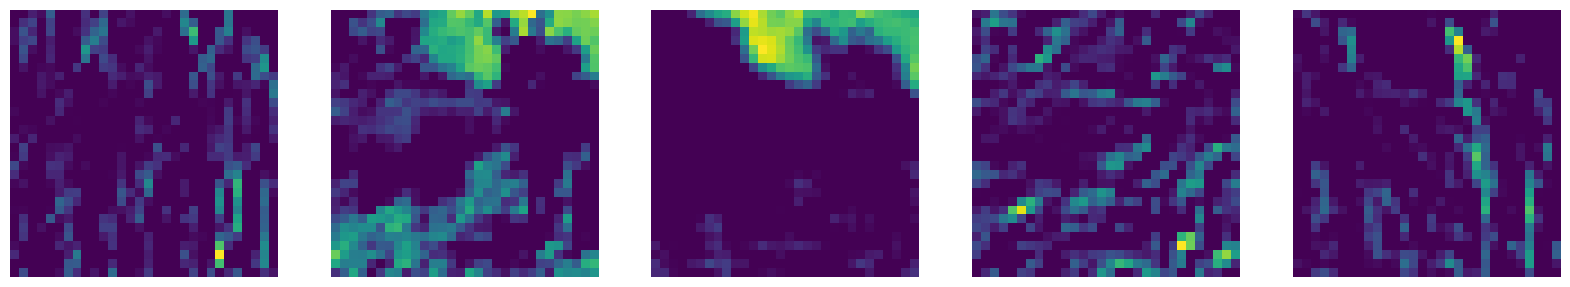

1/1 [==============================] - 0s 73ms/step
Layer: maxpool_1
Output shape: (1, 15, 15, 32)
Output values:
[[[[1.91189587e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.25359917e-01 1.68411165e-01]
   [2.86124587e-01 1.23349071e-01 0.00000000e+00 ... 0.00000000e+00
    2.78330445e-01 1.33562356e-01]
   [4.23803866e-01 2.31347471e-01 2.43955314e-01 ... 0.00000000e+00
    3.19652230e-01 3.41141313e-01]
   ...
   [5.57757974e-01 4.07183260e-01 5.17433167e-01 ... 0.00000000e+00
    6.33087009e-04 1.65212691e-01]
   [0.00000000e+00 4.03193444e-01 4.73482132e-01 ... 0.00000000e+00
    0.00000000e+00 1.79454416e-01]
   [0.00000000e+00 4.26897079e-01 4.61315632e-01 ... 0.00000000e+00
    0.00000000e+00 1.59315079e-01]]

  [[3.65684688e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.15364127e-01 2.01611638e-01]
   [3.04723531e-01 1.45000607e-01 0.00000000e+00 ... 0.00000000e+00
    3.86323839e-01 1.61545455e-01]
   [2.94402182e-01 1.06157154e-01 0.00000000e+00 ... 

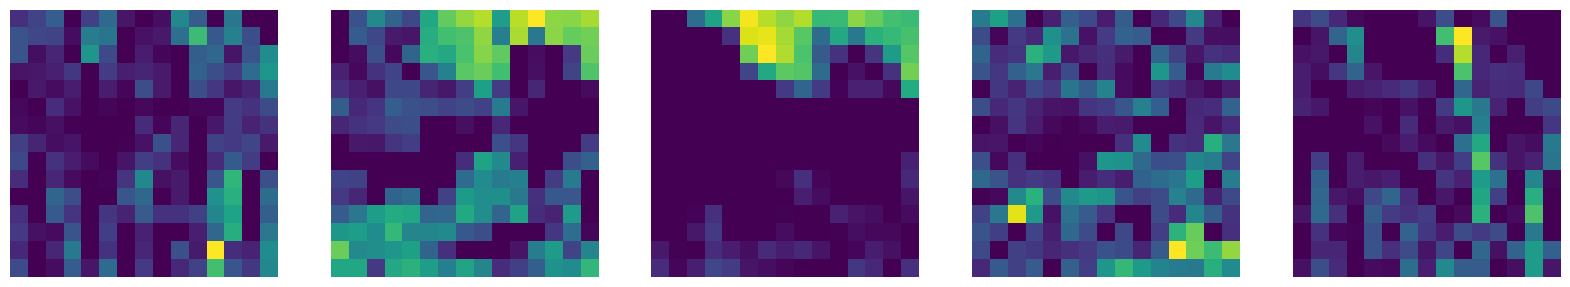

1/1 [==============================] - 0s 87ms/step
Layer: conv_2
Output shape: (1, 13, 13, 64)
Output values:
[[[[0.         0.75065976 0.         ... 0.         0.2678569
    0.        ]
   [0.         0.65436906 0.         ... 0.         0.
    0.        ]
   [0.         0.949529   0.         ... 0.         0.
    0.8758754 ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.68178576]
   [0.         0.         0.         ... 0.         0.6878923
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.15523453]]

  [[0.         0.4698843  0.         ... 0.         0.
    0.        ]
   [0.         0.5723825  0.         ... 0.         0.
    0.        ]
   [0.         0.30345285 0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.01914088]
   [0.         0.         0.         ... 0.         0.4468724
    1.0870569 ]
   [0.         0.         0.         ... 0.         1.0039295
    0.   

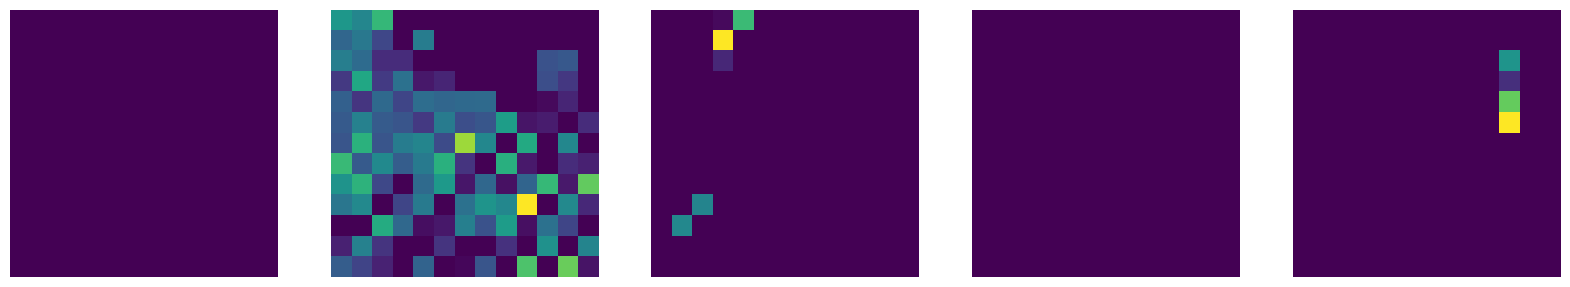

1/1 [==============================] - 0s 89ms/step
Layer: maxpool_2
Output shape: (1, 6, 6, 64)
Output values:
[[[[0.         0.75065976 0.         ... 0.         0.2678569
    0.        ]
   [0.         0.949529   1.0981034  ... 0.         0.46697396
    0.8758754 ]
   [0.         0.5990172  0.74993557 ... 0.         0.
    0.1643378 ]
   [0.         0.         0.         ... 0.         0.83654034
    0.18101443]
   [0.         0.         0.         ... 0.         1.9701525
    1.8088586 ]
   [0.         0.         0.         ... 0.         0.6878923
    1.0870569 ]]

  [[0.         0.84884566 0.         ... 0.         0.33066815
    0.        ]
   [0.         0.5319869  0.12156203 ... 0.         0.1375855
    0.        ]
   [0.         0.14756238 0.         ... 0.         0.7636244
    0.02684836]
   [0.         0.         0.         ... 0.21323703 0.52558416
    0.        ]
   [0.         0.         0.         ... 0.         1.0706444
    0.5225167 ]
   [0.         0.39386725 0.   

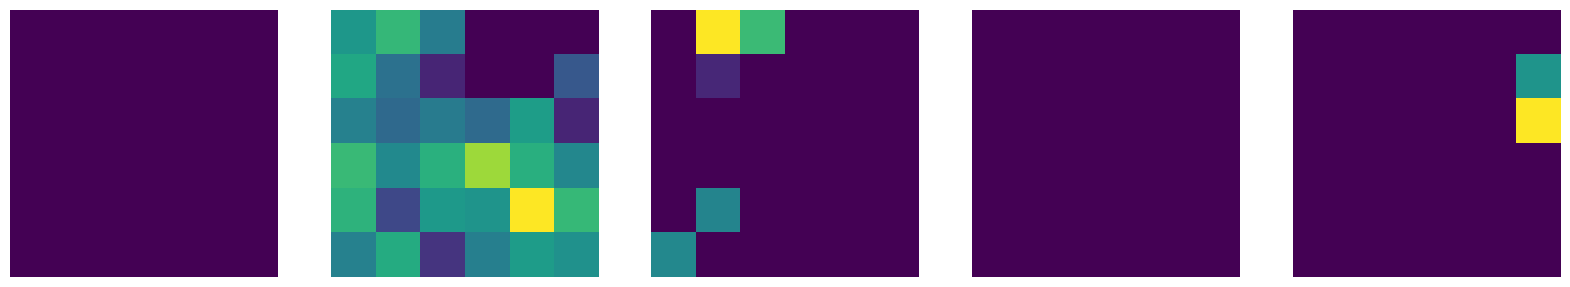

In [19]:
# Visualisasi hasil dari layer pertama Convolution, Max Pooling, dan Flatten
img_array = load_and_preprocess_image(img_path1)
visualize_layer('conv_1', img_array)
visualize_layer('maxpool_1', img_array)
visualize_layer('conv_2', img_array)
visualize_layer('maxpool_2', img_array)


In [20]:
# Visualisasi perhitungan flatten
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('flatten').output)
intermediate_output = intermediate_layer_model.predict(img_array)
print("Layer: flatten")
print(f"Output shape: {intermediate_output.shape}")
print("Output values:")
print(intermediate_output)

1/1 [==============================] - 0s 66ms/step
Layer: flatten
Output shape: (1, 2304)
Output values:
[[0.         0.75065976 0.         ... 0.         0.56353986 0.4283262 ]]
